# Tarea 1: Rodrigo Stevenson Regla

In [4]:
import pandas as pd
import scipy as sp
import numpy as np
import sklearn
import imblearn
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler



In [5]:
astros = pd.read_csv("unidad1/datos/SDSS-DR14.csv")
display(astros)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


# Variables de SDSS DR14

- objid: Numero que identifica el objeto en la imagen
- ra: Ascemsion recta en grados del objeto en la imagen.
- dec: Declinacion del objeto en la imagen medido en grados
- u: Componente del espectro del sistema fotometrico Fukugita medido en Angstrom, corresponde a ultravioleta.
- g: Componente del espectro del sistema fotometrico Fukugita medido en Angstrom, corresponde a verde.
- r: Componente del espectro del sistema fotometrico Fukugita medido en Angstrom, corresponde a rojo.
- i: Componente del espectro del sistema fotometrico Fukugita medido en Angstrom, corresponde a infrarrojo.
- z: Componente del espectro del sistema fotometrico Fukugita medido en Angstrom, corresponde a anchos de banda superior a infrarrojo.
- run: Numero usado para identificar la ejecucion sobre la imagen.
- rerun: Numero usado para identificar el reprocesamiento de la imagen en run.
- camcol:
- specobjid: Identificacion unica de codificacion 64-bits usada para objetos opticos espectrometricos. 
- class: Descripcion de a que objeto corresponde el estudiado(Galaxia, Quassar o Estrella).
- redshift: Medida de corrimiento al rojo usado para determinar distancias y velocidad del objeto.
- plate: ID numerica para identificar el plate usado.
- mjd: Fecha juliana modificada del momento en el que se tomo la foto.
- fiberid: ID asignada al objeto acorde a las fibras usadas.

In [6]:
#verificar si hay nulos
astros.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

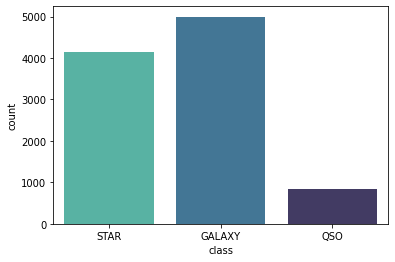

In [7]:
#Ver cuantos objetos hay de cada clase
sb.countplot(x='class', data=astros, palette="mako_r")
plt.show()

In [8]:
astros.groupby('class').mean()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
class,,,,,,,,,,,,,,,,,
GALAXY,1.237650e+18,177.333570,15.764372,18.804339,17.350216,16.649506,16.272770,16.017923,996.711685,301.0,3.654662,300.963585,5.379141e+17,0.080325,477.680672,52030.280912,340.108844
QSO,1.237650e+18,177.468000,20.570639,18.942928,18.678714,18.498535,18.360007,18.274761,1036.120000,301.0,3.694118,304.983529,1.447231e+18,1.218366,1285.305882,52694.289412,381.558824
STAR,1.237650e+18,172.962158,12.544824,18.330439,17.130547,16.732093,16.594047,16.531119,950.886561,301.0,3.632225,303.552264,3.018202e+18,0.000043,2680.613198,54093.892823,362.838391


Se puede apreciar que el dataset esta un poco desbalanceado dado que hay relativamente pocos elementos de quassar respecto a estrella y galaxia, alrededor en razones de ~1:4 y ~1:5 respectivamente. El balanceo se aplicara posteriormente en el dataset de entrenamiento previo a la clasificacion.

                  objid            ra           dec             u  \
objid      1.000000e+00  2.524419e-14 -1.937483e-15  5.581214e-14   
ra         2.524419e-14  1.000000e+00  3.596046e-03  3.123756e-02   
dec       -1.937483e-15  3.596046e-03  1.000000e+00  3.527932e-02   
u          5.581214e-14  3.123756e-02  3.527932e-02  1.000000e+00   
g          1.001149e-13  4.390863e-02  6.187471e-02  8.492320e-01   
r          2.995673e-14  4.710290e-02  6.340395e-02  6.923790e-01   
i          2.212198e-14  4.573107e-02  5.829189e-02  6.026302e-01   
z         -4.107700e-14  4.294957e-02  5.687030e-02  5.514828e-01   
run       -1.553011e-14 -9.274056e-02  7.783849e-01  3.822910e-02   
rerun               NaN           NaN           NaN           NaN   
camcol     1.921887e-15 -6.293831e-03  1.146139e-01  9.944672e-03   
field      5.938881e-16  5.946996e-01 -1.314714e-01  8.547880e-03   
specobjid -1.829075e-15 -9.532711e-02  8.834533e-02 -1.294293e-01   
redshift   5.085882e-16  3.030740e

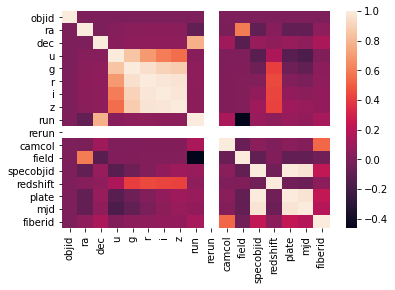

In [9]:
print(astros.corr())
sb.heatmap(astros.corr())

Acorde a los conceptos leidos de cada atributo y analizando la matriz de correlacion se decide conservar para el entrenamiento las siguientes variables: u,g,r,i,z y redshift, dado que son atributos relacionados directamente con los objetos a estudiar y poseen un coeficiente de correlacion que se considera bueno para que se usen estos atributos(galaxia, quassar y estrella), mientras que se opta por dejar de usar objid, ra, dec, run, rerun, camcol, field, specobjid, plate, mjd y fiberid dada su baja relacion a los objetos.

In [10]:
astros_clean = astros.drop(['objid','ra','dec','run','rerun','camcol','field','specobjid','plate','mjd','fiberid'],1)

In [11]:
#astro_object = pd.get_dummies(astros_clean['class'],drop_first=False);
#astros_clean = astros_clean.drop(['class'],1)
#astros_clean = pd.concat([astros_clean,astro_object], axis = 1)


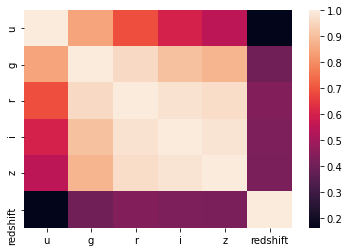

In [12]:
sb.heatmap(astros_clean.corr())

Se puede apreciar una correlacion elevada entre algunas de las variables restantes, algunas incluso con valores de 0.9 aprox; sin embargo, se optara por proceder de igual manera al entrenamiento ya que igual se presenta correlaciones bajas, como por ejemplo de todas los atributos con redshift, o de z con u.

In [13]:
astros_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   u         10000 non-null  float64
 1   g         10000 non-null  float64
 2   r         10000 non-null  float64
 3   i         10000 non-null  float64
 4   z         10000 non-null  float64
 5   class     10000 non-null  object 
 6   redshift  10000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


In [14]:
astros_clean

,u,g,r,i,z,class,redshift
0,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055
2,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111
3,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111
4,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590
...,...,...,...,...,...,...,...
9995,18.81777,17.47053,16.91508,16.68305,16.50570,GALAXY,0.027583
9996,18.27255,17.43849,17.07692,16.71661,16.69897,GALAXY,0.117772
9997,18.75818,17.77784,17.51872,17.43302,17.42048,STAR,-0.000402
9998,18.88287,17.91068,17.53152,17.36284,17.13988,GALAXY,0.014019


In [15]:
#Seleccion de datos
X = astros_clean.iloc[:,[0,1,2,3,4,6]].values
#Y_galaxy = astros_clean.iloc[:,[6]].values
#Y_quassars = astros_clean.iloc[:,[7]].values
#Y_stars = astros_clean.iloc[:,[8]].values
Y_full = astros_clean.iloc[:,[5]].values

In [16]:
X

array([[ 1.947406e+01,  1.704240e+01,  1.594699e+01,  1.550342e+01,
         1.522531e+01, -8.960000e-06],
       [ 1.866280e+01,  1.721449e+01,  1.667637e+01,  1.648922e+01,
         1.639150e+01, -5.490000e-05],
       [ 1.938298e+01,  1.819169e+01,  1.747428e+01,  1.708732e+01,
         1.680125e+01,  1.231112e-01],
       ...,
       [ 1.875818e+01,  1.777784e+01,  1.751872e+01,  1.743302e+01,
         1.742048e+01, -4.015730e-04],
       [ 1.888287e+01,  1.791068e+01,  1.753152e+01,  1.736284e+01,
         1.713988e+01,  1.401894e-02],
       [ 1.927586e+01,  1.737829e+01,  1.630542e+01,  1.583548e+01,
         1.550588e+01,  1.184173e-01]])

In [17]:
def count(array):
    ng = 0
    nq = 0
    ns = 0
    for i in array:
        if i == 'GALAXY':
            ng += 1
        elif i == 'QSO':
            nq += 1
        else:
            ns += 1
    print('Galaxy found: ',ng,'\n')
    print('Quassar found: ',nq,'\n')
    print('Star found: ',ns,'\n')

In [18]:
#Se opta por usar un oversampling y hacer que todas las clases tengan el mismo numero de ejemplos que la clase mayoritaria
def balance(X_set, Y_set):
    oversample = RandomOverSampler(sampling_strategy='not majority')
    X_train, X_test, Y_train, Y_test = train_test_split(X_set, Y_set, test_size = .5, random_state=25)
    #count(Y_train)
    X_train, Y_train = oversample.fit_resample(X_train, Y_train)
    #X_train, Y_train = undersample.fit_resample(X_train, Y_train)
    #count(Y_train)
    return X_train, X_test, Y_train, Y_test
    

In [19]:
#Logistic regression
def logistic_train(X_set, Y_set):
    X_train, X_test, Y_train, Y_test = balance(X_set,Y_set)
    LR = LogisticRegression()
    LR.fit(X_train, Y_train)
    print("coeficientes del modelo: "+str(LR.coef_))
    print("intercept: "+str(LR.intercept_))
    print('\n')
    
    #Predicciones
    Y_pred = LR.predict(X_test)
    print(Y_pred)
    print('\n')
    
    #Evaluación del rendimiento del clasificador
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(Y_test, Y_pred)
    print(confusion_matrix)
    print('\n')
    print(classification_report(Y_test, Y_pred))
    print('\n')

In [20]:
logistic_train(X, Y_full)

coeficientes del modelo: [[  0.62668095  -0.90132468   3.79201817  -0.71159005  -2.76932137
    3.3152471 ]
 [ -4.52249782   7.08289923   1.95628545  -1.81217491  -2.6838444
   10.06291341]
 [  3.89581687  -6.18157455  -5.74830362   2.52376496   5.45316578
  -13.37816051]]
intercept: [-1.40298969 -0.34680919  1.74979888]


['QSO' 'GALAXY' 'GALAXY' ... 'QSO' 'STAR' 'QSO']


[[2307   21  147]
 [  13  427    0]
 [  33    9 2043]]


              precision    recall  f1-score   support

      GALAXY       0.98      0.93      0.96      2475
         QSO       0.93      0.97      0.95       440
        STAR       0.93      0.98      0.96      2085

    accuracy                           0.96      5000
   macro avg       0.95      0.96      0.95      5000
weighted avg       0.96      0.96      0.96      5000





/home/panda/anaconda3/envs/ia/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#Decision tree
def DTree_train(X_set, Y_set, name):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test= balance(X_set, Y_set)
    #print(train_test_split(X_set, Y_set, test_size = .5, random_state=25))
    from sklearn import tree
    #Entrenamiento
    udt = tree.DecisionTreeClassifier()
    udt = udt.fit(X_train,y_train)
    print(udt.feature_importances_)
    #Predicciones
    y_pred = udt.predict(X_test)
    #Evaluación del rendimiento del clasificador
    
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)
    #Print de la matriz de confusión
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))
    from sklearn.externals.six import StringIO
    import pydot #sudo apt install python3-pydot graphviz

    dot_data = StringIO()

    features=['u','g','r','i','z','redshift']
    classes=['galaxy','quassar','star']
    tree.export_graphviz(udt,out_file=dot_data,feature_names=features,class_names=classes, filled=True, 
                         rounded=True, impurity=False)

    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    graph[0].write_png(name)

In [22]:
DTree_train(X,Y_full,'modeloF.png')

[0.01278821 0.0064883  0.00344136 0.00660704 0.0098473  0.96082777]
[[2452   21    2]
 [  35  405    0]
 [   9    2 2074]]
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.99      2475
         QSO       0.95      0.92      0.93       440
        STAR       1.00      0.99      1.00      2085

    accuracy                           0.99      5000
   macro avg       0.98      0.97      0.97      5000
weighted avg       0.99      0.99      0.99      5000



/home/panda/anaconda3/envs/ia/lib/python3.8/site-packages/sklearn/externals/six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


<img src="modeloF.png">Modelo DecisionTree Galaxy</img>

In [23]:
#Random Forest
def RF_train(X_set, Y_set):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test= balance(X_set, Y_set)
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.datasets import make_classification
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    print(clf.feature_importances_)
    #Predicciones
    y_pred = clf.predict(X_test)
    #Evaluación del rendimiento del clasificador
    
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)
    #Print de la matriz de confusión
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))


In [24]:
RF_train(X, Y_full)

[0.01714364 0.06813538 0.13315792 0.23905908 0.13672217 0.40578181]
[[2415   49   11]
 [  61  379    0]
 [   3    1 2081]]
              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97      2475
         QSO       0.88      0.86      0.87       440
        STAR       0.99      1.00      1.00      2085

    accuracy                           0.97      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.97      0.97      0.97      5000



## Comparacion:
- Precision galaxia: DT = LR > RF
- Precision quasar: DT = LR > RF
- Precision estrella: DT > RF > LR
- Recall galaxia: DT > RF > LR
- Recall quasar: LR > DT > RF
- Recall estrella: RF > DT > LR
- F1 galaxia: DT = RF > LR
- F1 quasar: LR > DT > RF
- F1 estrella: DT = RF > LR
- Accuracy precision (wa): DT = RF > LR
- Accuracy recall (wa): DT = RF > LR
- Accuracy f1-score (wa): DT = RF > LR

*Observaciones pueden variar por valores aleatorios pero conservan balances generales similares

Respecto a regresion logistica(LR), se puede decir que tenia a favor que no requeria escalar datos, por lo cual no se requeria de esto y ademas es bastante efectivo, sin embargo tenia en contra que los datos tenian un cierto nivel de correlacion que podria considerarse alto y ademas la data del dataset no era lineal, lo cual puede haber afectado en que tenga un rendimiento general menor a RF y DT; este problema podria escalar si se trabajan con datasets mas grandes que el usado, tambien su algoritmo no es muy rapido y en terminos de rendimiento se puede ver facilmente superado por otros.

Hablando de random forest(RF) es favorable decir que tiene un error bastante reducido y aunque no se hubiese balanceado la data, no le hubiera afectado dado que no le es problema trabajar con datasets desbalanceados, tambien si que quisiera aplicar un datasets de datos astronomicos mas grandes, RF igual es buena opcion para crear un modelo de clasificacion; RF tampoco suele tener problemas de overfitting y es muy util para extraer los atributos mas importantes, estos dos ultimos puntos se deben a los arboles que forman el modelo. Por otro lado es un modelo con un alto nivel de abstraccion debido a que funciona como una caja negra, por lo cual quien la use no tendra mucha idea de que esta pasando por debajo; el otro problema que puede tener esque se requiere que si o si los arboles no esten relacionados, en este caso se uso la funcion de libreria de sklearn por lo cual no deberia notarse ese problema, sin embargo como usa arboles por debajo es mas complejo y requiere un alto tiempo de entrenamiento, por ultimo, otro problema que podria haber afectado su rendimiento es que se requieren que los atributos deben tener cierta capacidad predictiva, afortunadamente para este caso parece que no y luego se conversara sobre eso.

Por ultimo arbol de decision(DT) es bueno por que casi no requiere un preprocesamiento de data, por lo cual se puede obviar el quitar atributos irrelevantes, tampoco requiere escalado o normalizacion de datos y tampoco tiene problemas con datos perdidos, ademas ofrece una visualizacion clara de lo que ocurre; para este tipo de datasets es ideal su uso, siempre y cuando este balanceado, afortunadamente en nuestro caso era un desbalanceo muy menor, por lo que incluso si no se hubiera balanceado el dataset, este modelo no deberia haber tenido mayores problemas. Sin embargo, como se menciono antes, si el dataset esta desbalanceado se requiere un balanceo, sino su efectividad se vera mermada, lo otro es que hay que cuidar su preprocesamiento y entrenamiento ya que DT tiende a sobreaprender y esto es algo que se quiere evitar



## Analisis
- Analizando los coeficientes de importancia de atributos de cada modelo, se puede observar lo siguiente:
    - Regresion Logistica: En general, el parametro redshift es el mas importante para clasificar tanto quasares como estrellas, mientras que para la clasificacion de galaxias son los parametros g,r y z.
    - Arbol de decision: Se puede apreciar que de por lejos redshift es el parametro mas importante, esto se aprecia en su porcentaje de importancia del alrededor del 94%.
    - Random forest: Similar al arbol de decision pero no de forma tan notoria, redshift es el parametro mas importante para la clasificacion con un porcentaje de 40%, otros atributos con importancia relativa en este modelo son u(18%) e i(22%).
    
Al final de esto se puede concluir que se podria emplear redshift mayormente para la clasificacion de estructuras astronomicas a fin de determinar a que clase podria corresponder, y esto se debe a que como se aprecia en la matriz de correlacion, redshift tiene una relacion relativamente media con u,g,r,i y z y esto es debido a que redshift se obtiene a partir de estas, sin embargo, observando los porcentajes de importancia en la clasificacion se puede decir que redshift es una variable relativamente dominante a la hora de clasificar objetos, pero dependiendo del modelo que se use, esta no se puede sobreapreciar sobre otros atributos, asi como en otros si puede reemplazarse por los demas atributos. Tomando como referencia lo observado se podria dar que simplemente se use redshift para entrenar los clasificadores dado que es un parametro elaborado a partir de otros atributos del dataset y los resultados obtenidos serian similares, de igual forma se puede usar solo (u,g,r,i,z) para entrenar y obtener resultados similares.